In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# perfil demografico 

# quantas pessoas tem na base?

df.shape[0]

891

In [5]:
# quais são as classes?

df["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [6]:
df["Pclass"].unique()

array([3, 1, 2], dtype=int64)

In [7]:
df["Pclass"].nunique()

3

In [8]:
df["Pclass"].value_counts()  # quantidade de passageiro por classe

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [9]:
(df["Pclass"].value_counts(normalize=True))*100  # porcetagem por classes

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

In [11]:
# qual distribuição de sexo ?

df["Sex"].nunique()

2

In [12]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [13]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
(df["Sex"].value_counts(normalize=True))*100

Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

In [16]:
# qual a distribuição da variaveis numericas?

df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Matplotlib is building the font cache; this may take a moment.


<Axes: ylabel='Frequency'>

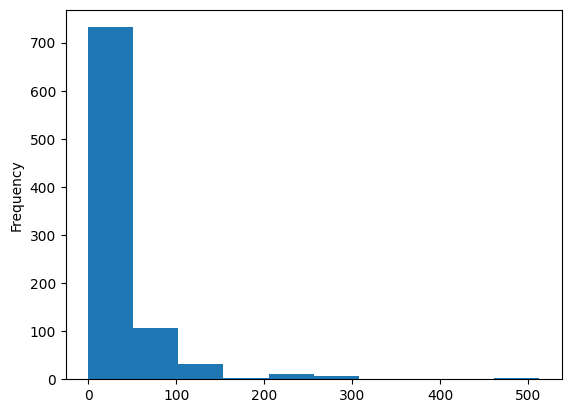

In [17]:
df["Fare"].plot(kind="hist")

In [20]:
# qual a taxa de sobrevivencia?

df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [21]:
(df["Survived"].value_counts(normalize=True))*100

Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

In [25]:
# Proporção de homens/mulheres que morreram/sobreviveram

df.query("Sex == 'male'")["Survived"].value_counts(normalize=True)*100  # Homens

Survived
0    81.109185
1    18.890815
Name: proportion, dtype: float64

In [26]:
# Proporção de homens/mulheres que morreram/sobreviveram em relação as classes

df.query("Sex == 'male' and Pclass == 1")["Survived"].value_counts(normalize=True)*100  # Homens 1 classe

Survived
0    63.114754
1    36.885246
Name: proportion, dtype: float64

In [28]:
# Groupby  analise agrupada

df.groupby(["Pclass", "Sex"])[["Survived"]].mean()*100

Survived
Pclass Sex              
1      female  96.808511
       male    36.885246
2      female  92.105263
       male    15.740741
3      female  50.000000
       male    13.544669

In [29]:
df.groupby(["Pclass", "Sex"])[["Fare"]].agg(["mean", "min", "max", "std"])

Fare                              
                     mean      min       max        std
Pclass Sex                                             
1      female  106.125798  25.9292  512.3292  74.259988
       male     67.226127   0.0000  512.3292  77.548021
2      female   21.970121  10.5000   65.0000  10.891796
       male     19.741782   0.0000   73.5000  14.922235
3      female   16.118810   6.7500   69.5500  11.690314
       male     12.661633   0.0000   69.5500  11.681696

In [33]:
# usando pivot_table

pd.pivot_table(df, "Survived", "Pclass", "Sex", aggfunc="mean")*100

Sex,female,male
Pclass,,
1,96.808511,36.885246
2,92.105263,15.740741
3,50.000000,13.544669


In [37]:
# relação entre o porto de embarque, taxa de sobrevivencia e a classe

df.groupby(["Pclass", "Embarked"])[["Survived"]].agg(["mean", "count"])

Survived      
                     mean count
Pclass Embarked                
1      C         0.694118    85
       Q         0.500000     2
       S         0.582677   127
2      C         0.529412    17
       Q         0.666667     3
       S         0.463415   164
3      C         0.378788    66
       Q         0.375000    72
       S         0.189802   353